## Importing libraries


In [59]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import urllib.request
from tensorflow.keras.models import load_model

## Load Data

In [62]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

## Display Data

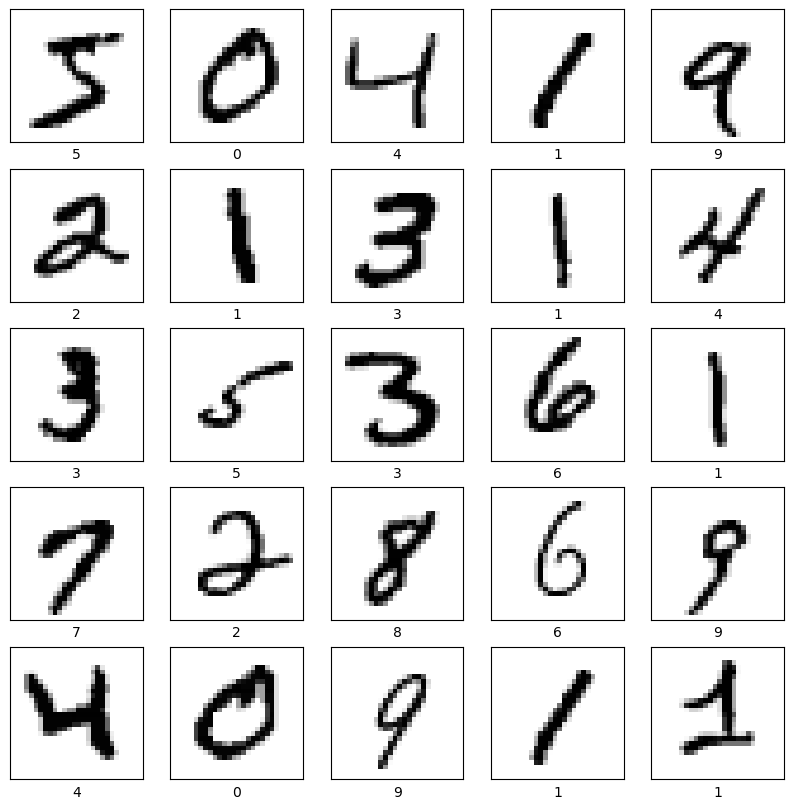

In [65]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(y_train[i])
plt.show()

## Expolre Data

In [68]:
print(f"we have {x_train.shape[0]} training images and {x_test.shape[0]} test images")

we have 60000 training images and 10000 test images


## Shape of Images

In [71]:
print("The shape of the data is",x_train[0].shape, "Pixels")
print("The shape of the data is",x_test[0].shape, "Pixels")

The shape of the data is (28, 28) Pixels
The shape of the data is (28, 28) Pixels


## Shape of Train and Test Data :

In [74]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


## First Image

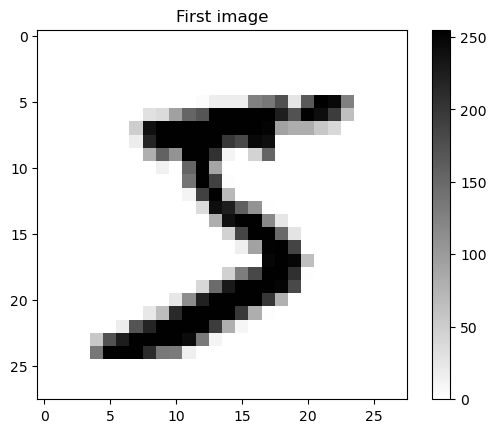

In [77]:
plt.title("First image")
plt.imshow(x_train[0], cmap = plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()


## Pixels Values of First Image:

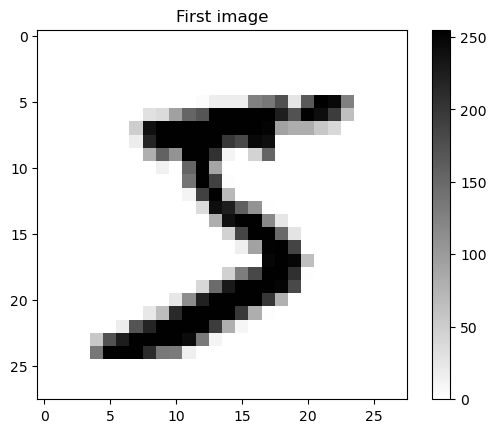

  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255 247 127   0   0   0   0 
  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0 
  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82  82  56  39   0   0   0   0   0 
  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 182 247 241   0   0   0   0   0   0 

In [80]:
plt.title("First image")
plt.imshow(x_train[0], cmap=plt.cm.binary)
plt.colorbar()
plt.show()

# Print pixels value
for row in x_train[0]:
    for pixel in row:
        print("{:3}".format(int(pixel)), end=" ")  # Convert pixel value to integer before formatting
    print()

## Preprocessing the Data :

### Reshape 

In [84]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

In [86]:
print (x_train.shape)
print (x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


###  Normalization

In [89]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

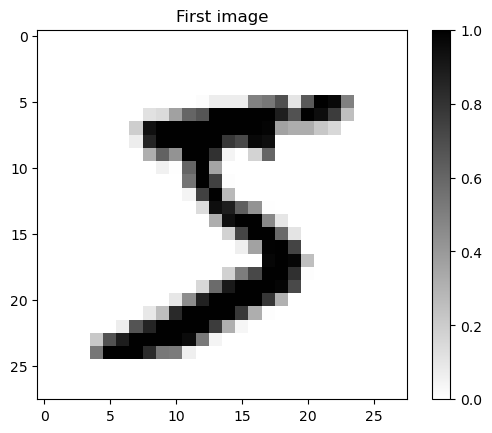

Pixels value after normalization
0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 
0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 
0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 
0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 
0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 
0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.012 0.071 0.071 0.071 0.494 0.533 0.686 0.102 0.

In [91]:
import matplotlib.pyplot as plt

# Print the first image
plt.title("First image")
plt.imshow(x_train[0], cmap=plt.cm.binary)
plt.colorbar()
plt.show()

# Print pixels value after normalization
print("Pixels value after normalization")

# Print pixels value
for row in x_train[0]:
    for pixel in row:
        print("{:.3f}".format(pixel.item()), end=" ")  # Access the pixel value using .item() method
    print()

## Build Model :

In [94]:
# Define input layer
input_layer = tf.keras.layers.Input(shape=(28, 28, 1))

# Define model architecture
model = tf.keras.models.Sequential([
    input_layer,
    # Convolutional layer with 32 filters and 3x3 kernel size, using ReLU activation
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu'),
    # Max pooling layer
    tf.keras.layers.MaxPooling2D(),
    # Convolutional layer with 32 filters and 3x3 kernel size, using ReLU activation
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu'),
    # Max pooling layer
    tf.keras.layers.MaxPooling2D(),
    # Convolutional layer with 32filters and 3x3 kernel size, using ReLU activation
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu'),
    # Max pooling layer
    tf.keras.layers.MaxPooling2D(),
    # Flatten layer to convert 2D data to 1D
    tf.keras.layers.Flatten(),
    # Output layer with 10 units (for 10 classes) and softmax activation
    tf.keras.layers.Dense(10, activation='softmax'),
])

### Model Summary

In [97]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 11, 11, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 5, 5, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 3, 3, 32)       │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 1, 1, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,146 (74.79 KB)

 Trainable params: 19,146 (74.79 KB)

 Non-trainable params: 0 (0.00 B)

###  Compile the Model :

In [100]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

### Fit the Model :

In [103]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(patience=5, restore_best_weights=True)
# fit the model
history=model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 28s 17ms/step - accuracy: 0.8182 - loss: 0.6022 - val_accuracy: 0.9625 - val_loss: 0.1271
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 37s 14ms/step - accuracy: 0.9673 - loss: 0.1076 - val_accuracy: 0.9707 - val_loss: 0.0963
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 24s 16ms/step - accuracy: 0.9774 - loss: 0.0770 - val_accuracy: 0.9793 - val_loss: 0.0654
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 22s 15ms/step - accuracy: 0.9824 - loss: 0.0593 - val_accuracy: 0.9811 - val_loss: 0.0656
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 23s 16ms/step - accuracy: 0.9838 - loss: 0.0514 - val_accuracy: 0.9826 - val_loss: 0.0587
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 25s 17ms/step - accuracy: 0.9871 - loss: 0.0440 - val_accuracy: 0.9824 - val_loss: 0.0568
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 35s 13ms/step - accuracy: 0.9882 - loss: 0.0398 - val_accuracy: 0.9808 - val_loss: 0.0648
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 21s 14ms/step - accuracy: 0.9888 -

###  Evaluate the Model :

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9799 - loss: 0.0731
Test accuracy: 0.9837999939918518
Test loss: 0.058823417872190475


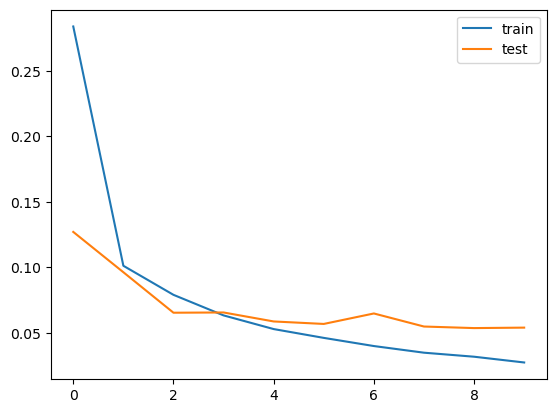

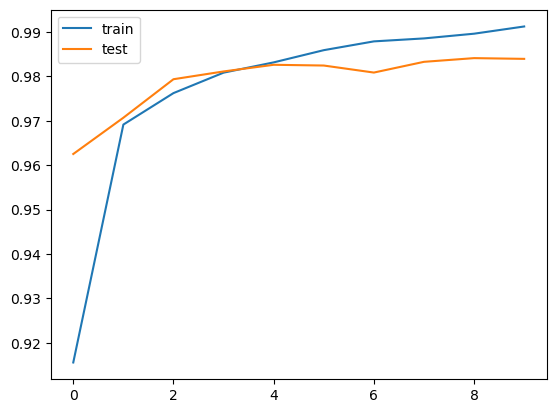

In [106]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)
print('Test loss:', test_loss)
# plot the loss
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()
# plot the accuracy
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show()

###  Custom Images predict :

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step


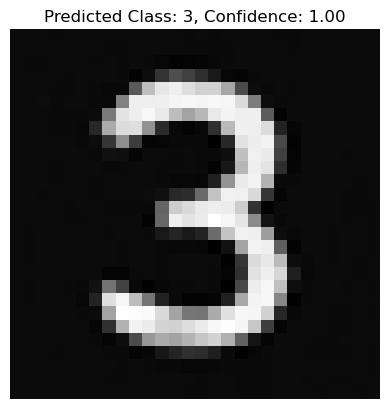

In [113]:
# Load and preprocess the custom image
def load_and_preprocess_image(image_path):
    # Open the URL for reading
    with urllib.request.urlopen(image_path) as url:
        # Load the image
        image = np.array(Image.open(url))
    
    # Convert to grayscale
    if len(image.shape) > 2:
        image = np.mean(image, axis=2)
    # Resize to 28x28 pixels
    image = np.array(Image.fromarray(image).resize((28, 28)))
    # Invert the colors (if needed)
    image = 255 - image
    # Normalize pixel values to [0, 1]
    image = image / 255.0
    # Reshape to match the model's input shape
    image = image.reshape((1, 28, 28, 1))
    return image
    # Predict the class of the custom image
def predict_custom_image(model, image):
    # Make prediction
    predictions = model.predict(image)
    # Get the predicted class (index with highest probability)
    predicted_class = np.argmax(predictions)
    # Get the probability of the predicted class
    confidence = predictions[0][predicted_class]
    return predicted_class, confidence

# Path to your custom image
custom_image_path = 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRRGkuQ7C_f9QxE5bZP5FfZCiiOpcbVaqT0RxhganEh_bgaiQC0IiGB82vPfasRwl10x-U&usqp=CAU'

# Load and preprocess the custom image
custom_image = load_and_preprocess_image(custom_image_path)

# Predict the class of the custom image
predicted_class, confidence = predict_custom_image(model, custom_image)

# Display the prediction
plt.imshow(custom_image.reshape(28, 28), cmap='gray')
plt.title(f"Predicted Class: {predicted_class}, Confidence: {confidence:.2f}")
plt.axis('off')
plt.show()

 ### Confusion matrix 

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


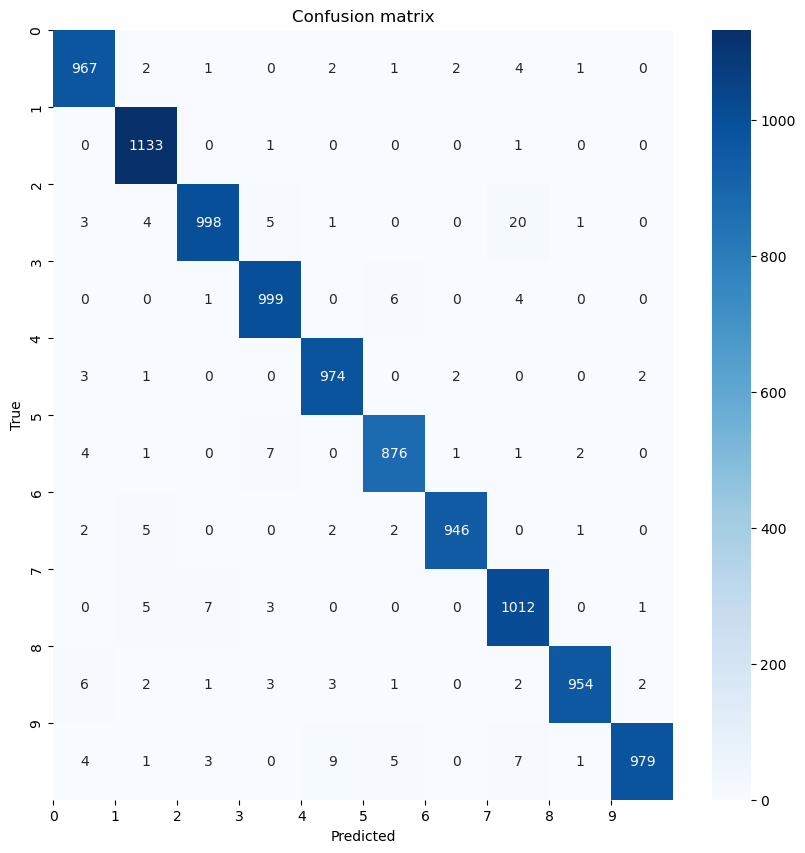

In [116]:
plt.figure(figsize=(10,10))
from sklearn.metrics import confusion_matrix
y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
tick_marks = np.arange(10)
plt.xticks(tick_marks, tick_marks)
plt.yticks(tick_marks, tick_marks)
plt.show()

### Save Model :

In [123]:
model.save("my_model.h5")
from tensorflow.keras.models import load_model

# Load the saved model
loaded_model = load_model("my_model.h5")